# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [8]:
import tensorflow as tf

## Get the dataset

In [9]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [10]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [11]:
from keras.utils import np_utils
# pre-processing the respected datasets
# we can normalize data before hands such that large terms of the calculations can be reduced to smaller terms. 
# Like, we can normalize the x_train and x_test data by dividing it by 255.
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# enabling one hot encoding of class basically converting y_test,Y_train,Y_test  from strings to vector forms
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
y_test = np_utils.to_categorical(y_test)

print("Training datasets: ")

print(X_train.shape)
print(Y_train.shape)

print('\n')
print("Validation datasets: ")

print(X_test.shape)
print(Y_test.shape)
print('\n')
print("Testing datasets: ")
print(X_test.shape)
print(Y_test.shape)

Training datasets: 
(8000, 28, 28)
(8000, 10)


Validation datasets: 
(2000, 28, 28)
(2000, 10)


Testing datasets: 
(2000, 28, 28)
(2000, 10)


## Visualize the dataset
Print some images with labels.

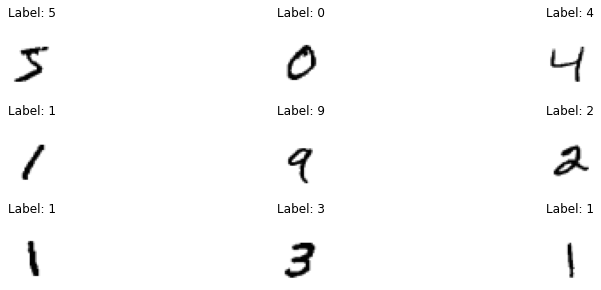

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4.5))
for i in range(9):  
    plt.subplot(3, 3, i+1)
    plt.title('Label: {label}\n'.format(label=y_train[i]))
    plt.imshow(x_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=1)
plt.show()

# Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

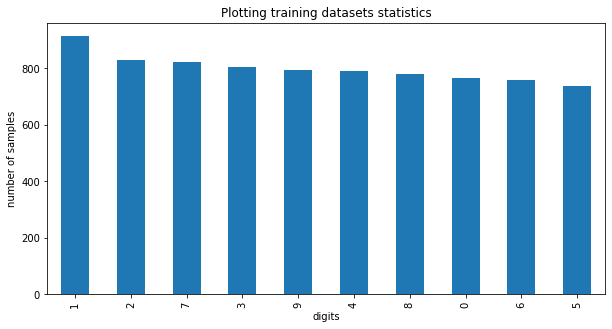

In [13]:
import numpy as np
import pandas as pd
# column_val2 =['labels_of_Y_train']
# p1= plt.figure(figsize=(10, 5))

# df = pd.DataFrame(data = y_train, columns = column_val1)
# #print(df)
# print('\n')
# plt.title("Plotting training datasets statistics")

# plt.xlabel('digits') 
# plt.ylabel('number of samples')
# df['labels_of_y_train'].value_counts().plot.bar()
 
 
Y_train_list = []
for i in Y_train:
  Y_train_list.append(np.argmax(i))

Y_train_datasets = np.array(Y_train_list)
# print(y_test_datasets)
p1= plt.figure(figsize=(10, 5))
column_val1 =['labels_of_Y_train']
df = pd.DataFrame(data = Y_train_datasets, columns = column_val1)
#print(df)
print('\n')

plt.title("Plotting training datasets statistics")
plt.xlabel('digits') 
plt.ylabel('number of samples') 
df['labels_of_Y_train'].value_counts().plot.bar()


# Your code

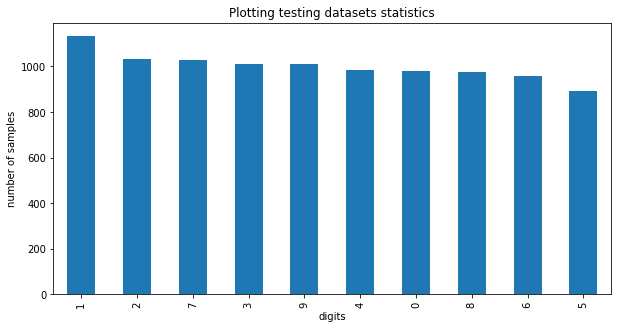

In [15]:
# Plotting countplot for testing datasets. 
# the y_test datasets has (12000,10) where each of the class is represented in one hot encoding.
# therefore we ran a loop to traverse in the array and to acquire the numbers from the index through np.argmax.
# for example [0. 0. 0. 1. 0. 0. 0. 0. 0. 0] ---> value will give 3 as 1 (maximum) is present in 3rd index. 
# the results will be similarly append to the list which can be used for plotting count plot.

Y_test_list = []
for i in y_test:
  Y_test_list.append(np.argmax(i))

Y_test_datasets = np.array(Y_test_list)
# print(y_test_datasets)
p1= plt.figure(figsize=(10, 5))
column_val2 =['labels_of_Y_test']
df = pd.DataFrame(data = Y_test_datasets, columns = column_val2)
#print(df)
print('\n')

plt.title("Plotting testing datasets statistics")
plt.xlabel('digits') 
plt.ylabel('number of samples') 
df['labels_of_Y_test'].value_counts().plot.bar()

  
# displaying the title


## Model

In [19]:
# model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)

# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 
model=Sequential()
    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    

In [27]:
# Compile the model (add optimizers and metrics)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Fit the model on the training data (specify validation_split, read about validation if new to you)

history = model.fit( X_train, Y_train, epochs=10, verbose=1, validation_data=(X_test, Y_test))



Epoch 1/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0634 - accuracy: 0.9831 - val_loss: 0.0813 - val_accuracy: 0.9785
Epoch 2/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.1118 - val_accuracy: 0.9750
Epoch 3/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0327 - accuracy: 0.9918 - val_loss: 0.1225 - val_accuracy: 0.9765
Epoch 4/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0297 - accuracy: 0.9909 - val_loss: 0.0608 - val_accuracy: 0.9845
Epoch 5/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0306 - accuracy: 0.9910 - val_loss: 0.0763 - val_accuracy: 0.9790
Epoch 6/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.1189 - val_accuracy: 0.9790
Epoch 7/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.1190 - val_accuracy: 0.9720
Epoch 

In [28]:
evaluation = model.evaluate(X_test, Y_test, batch_size=128, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

16/16 [==============================] - 0s 7ms/step - loss: 0.0699 - accuracy: 0.9880
Summary: Loss over the test dataset: 0.07, Accuracy: 0.99


## Predict some images
Print the image along with its label (true value) and predicted value.

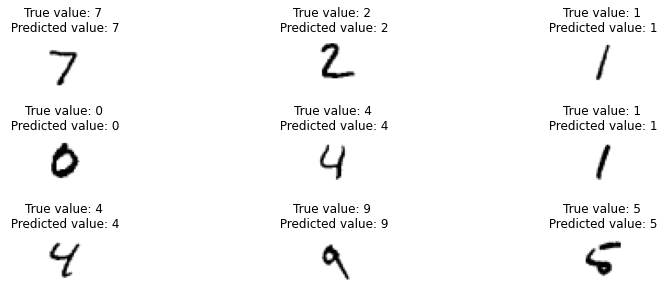

In [32]:
y_pred = model.predict(x_test)
plt.figure(figsize=(15,4.5))
for i in range(9):  
    plt.subplot(3, 3, i+1)
    plt.title('True value: {label1}\n Predicted value: {label2}'.format(label1 =y_test[i].argmax() ,label2 =y_pred[i].argmax()))
    plt.imshow(x_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=1)
plt.show()